<a href="https://colab.research.google.com/github/pvdklei/modelsmakemodels/blob/master/pepijn/cifar10_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import visual_tools as vt
import importlib
import cv2
import torchvision 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


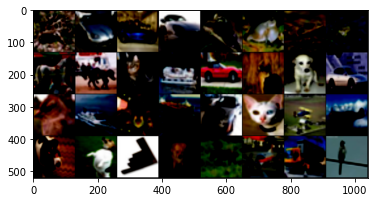

In [4]:
def showimage(image):
    image = image.numpy()
    image = image.transpose((1, 2, 0))
    plt.imshow(image)
images = torch.load("test_images.tensor")

showimage(torchvision.utils.make_grid(images))

In [9]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 16 * 64, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        self.a = x
        x = self.pool(F.relu(self.conv2(x)))
        self.b = x
        x = self.pool(F.relu(self.conv3(x)))
        self.c = x
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MyModel()
model.cpu()

MyModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.2, inplace=False)
)

In [10]:
# load model
state_dict = torch.load("ninetynine.model", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

In [11]:
vt = importlib.reload(vt)

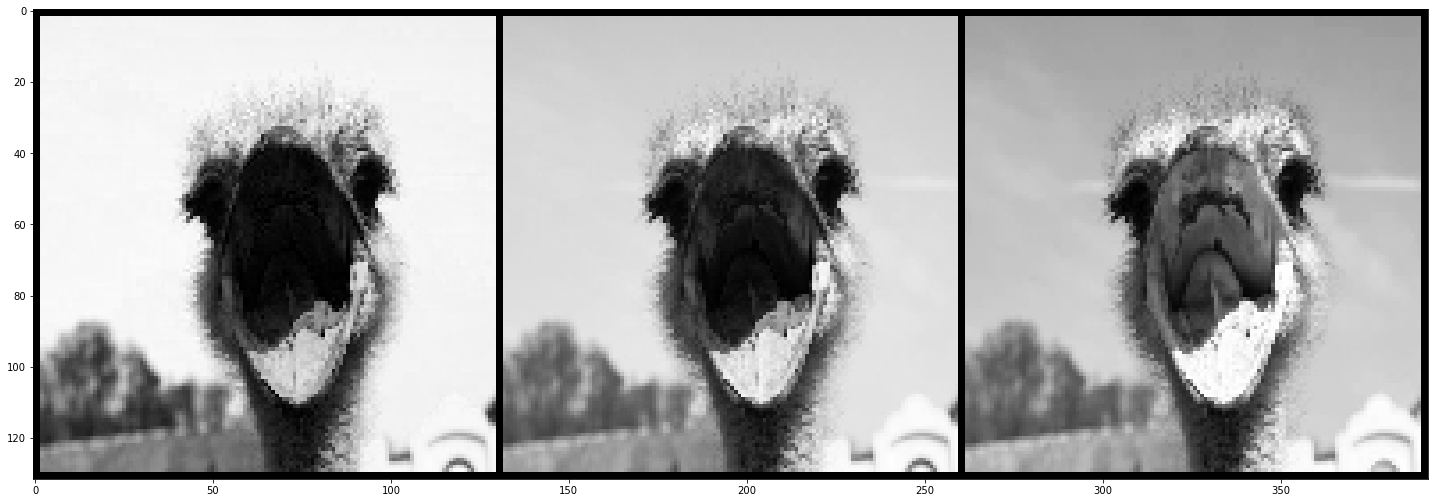

In [12]:
image = cv2.imread("struisvogel.jpg")
image = cv2.resize(image, (128, 128))
image = torch.from_numpy(image).permute(2, 0, 1).type(torch.FloatTensor)
vt.show_image_channels(image)

tensor([[-12.9504,  -4.8878,   8.2043,   2.8416,   0.7030,   1.7951,  16.5499,
          -5.0942,  -6.4023,  -1.7703]], grad_fn=<AddmmBackward>)
original


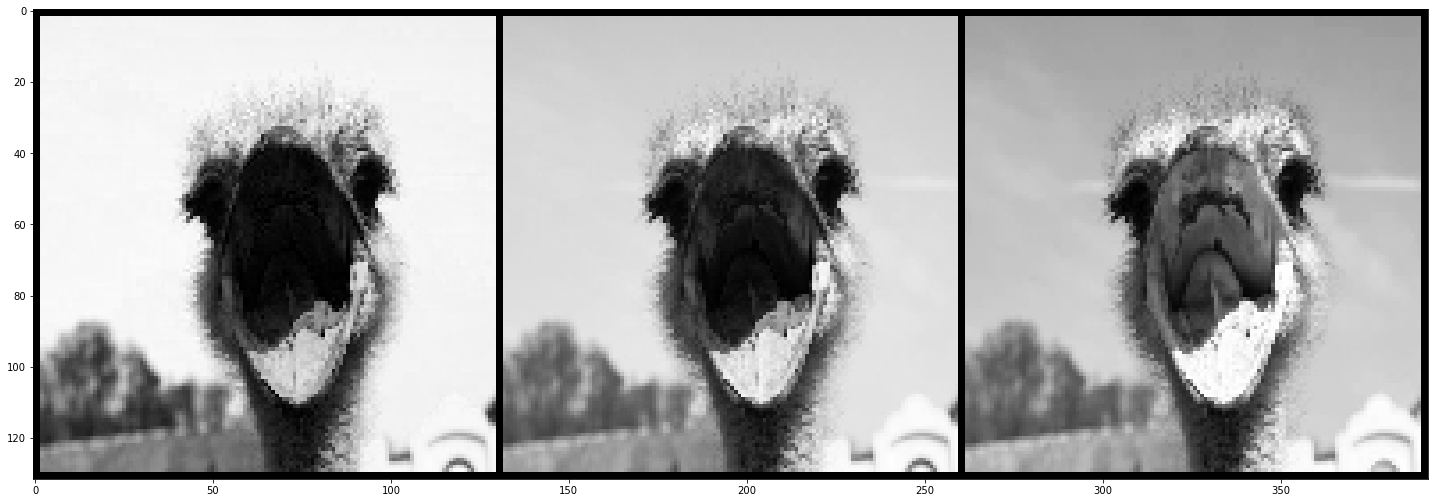

after some layer(s)


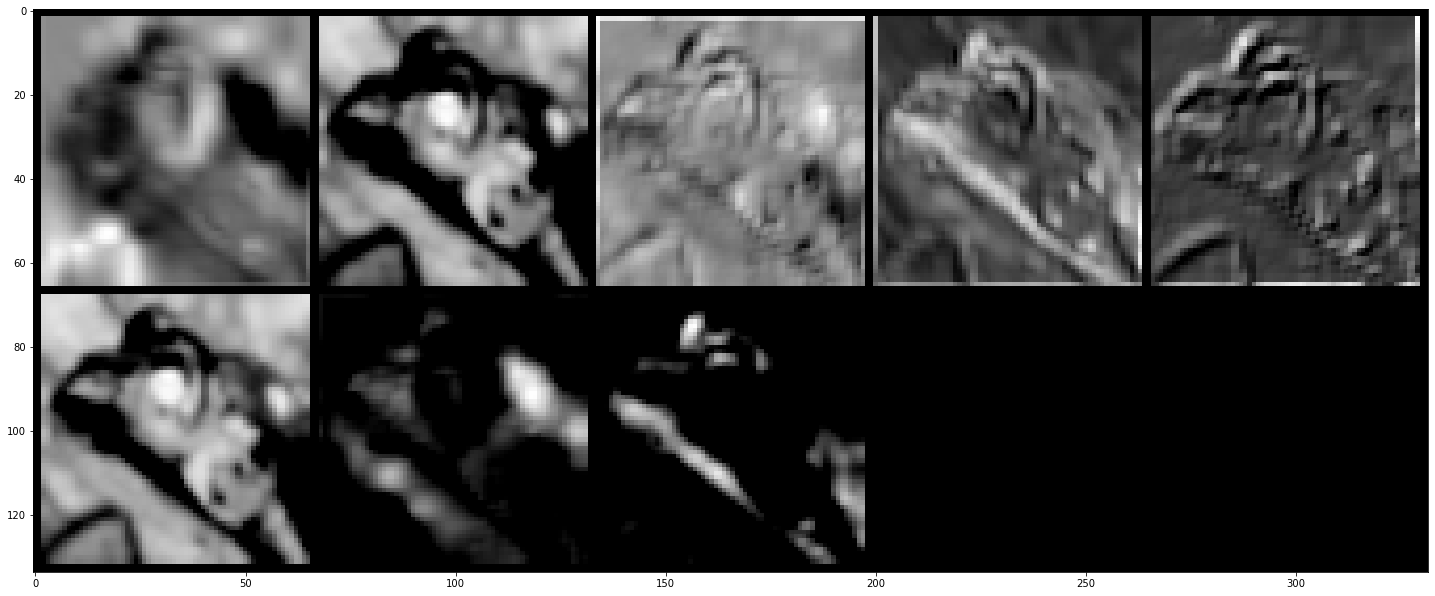

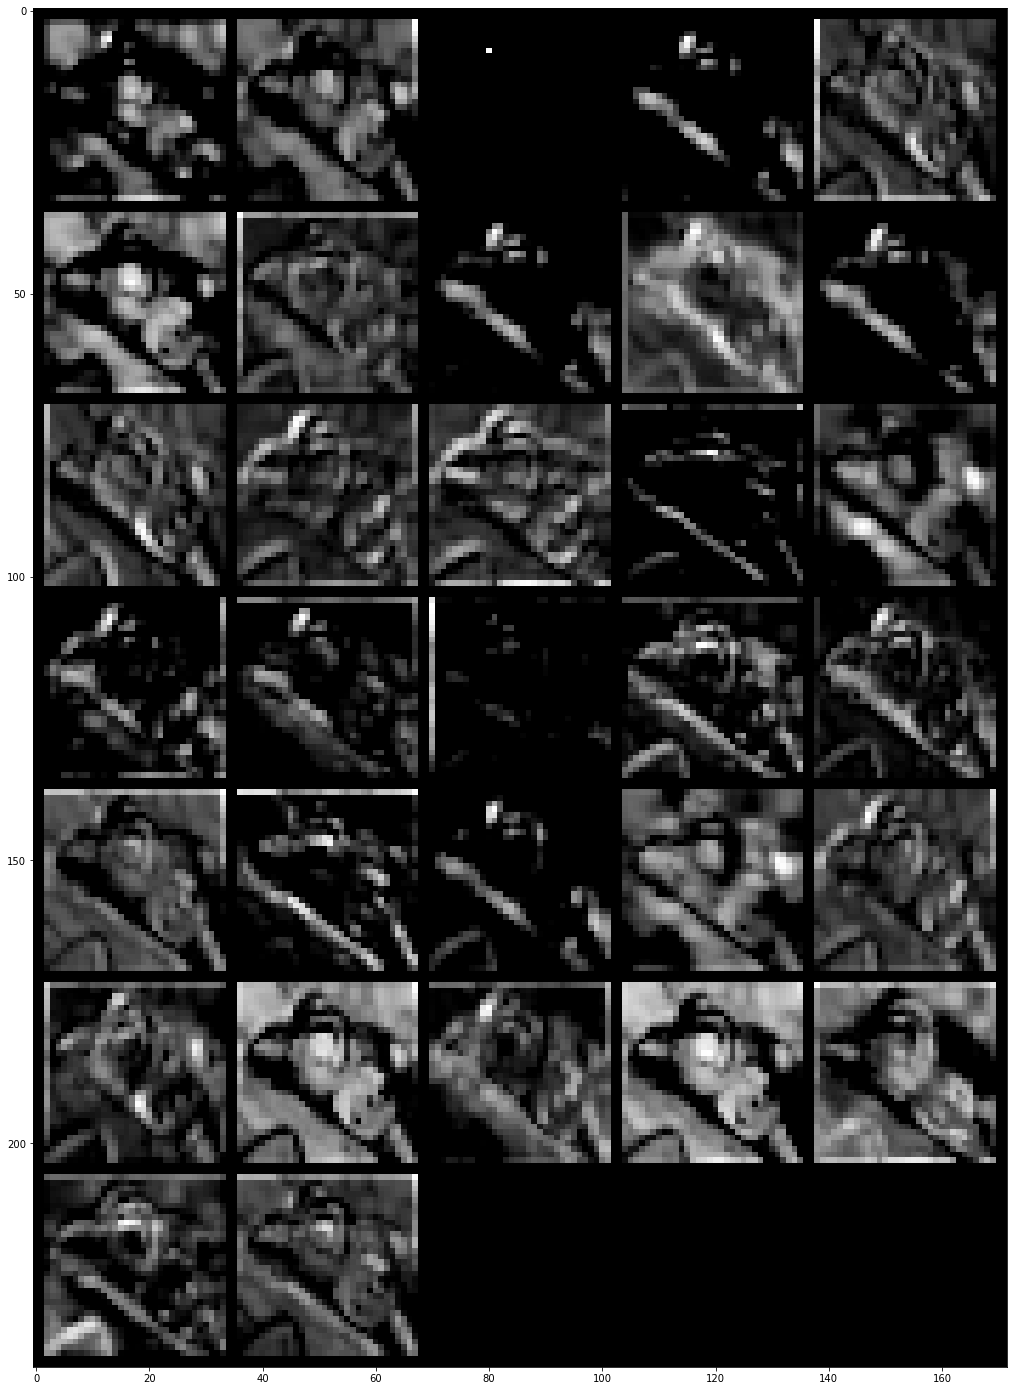

In [17]:
i = 4
image_og = images[i]
r = model(image_og.unsqueeze(0))
print(r)
image_a = model.a
image_b = model.b

print("original")
vt.show_image_channels(image)
print("after some layer(s)")
vt.show_image_channels(image_a[0])
vt.show_image_channels(image_b[0])


In [65]:
vt = importlib.reload(vt)
vt.tSNE(images)

[[ -79.776634     16.116814  ]
 [ -43.664165    -58.95472   ]
 [-107.02735      52.33837   ]
 [ -13.214356    123.91104   ]
 [   9.317412     44.98899   ]
 [  99.882126     39.185978  ]
 [  -0.96406776    0.6130199 ]
 [ -85.20461     -72.73984   ]
 [ -52.398815   -102.33067   ]
 [  36.600903   -117.26694   ]
 [  79.89474     -45.717255  ]
 [  76.82969      86.03295   ]
 [  25.347042     89.415794  ]
 [   8.402378    -43.955357  ]
 [ -78.986374    -28.314512  ]
 [  33.744186     13.896848  ]
 [ -46.453568     -1.3951123 ]
 [  51.22218      48.053905  ]
 [ -23.789362    -28.523083  ]
 [  43.48825     -69.529785  ]
 [-127.888115    -49.281387  ]
 [ -11.359672   -127.93934   ]
 [  -5.0881896   -81.40568   ]
 [ -59.172916     53.408344  ]
 [  72.90527       1.197699  ]
 [ 117.23801     -12.139548  ]
 [  91.50127    -109.897545  ]
 [ -65.026024     97.948586  ]
 [ -19.981762     73.724     ]
 [  38.667507    -23.97877   ]
 [ -26.451902     31.127981  ]
 [-120.78313       0.82165647]]
